In [44]:
import numpy
from scipy import stats
import matplotlib.pyplot as plt

In [45]:
s_e = 1

def importance(s1, s2, y=1): 
    pr = 1-stats.norm(s1-s2, s_e**0.5).cdf(0) if y>0 else stats.norm(s1-s2, s_e**0.5).cdf(0)
    return pr

In [103]:
m1, m2 = 0, 0
v1, v2 = 1, 1

num_samples = 5000
drops = 1000

def approx_gaussian(data, importances): 
    mean = numpy.average(data, weights=importances)
    variance = numpy.average((data-mean)**2, weights=importances)
    return mean, variance

In [104]:
# observed results
ys = [1,0,1,1,1,1,1]

for y in ys: 
    posterior = []
    post_weights = []
    s1 = 0
    s1_w = 1

    for _ in range(num_samples):
        s2 = stats.norm.rvs(m2, v2**0.5)
        s2_w = importance(s1, s2, y)
        
        posterior.append((s1, s2))
        post_weights.append((s1_w, s2_w))

        s1 = stats.norm.rvs(m1, v1**0.5)
        s1_w = importance(s1, s2, y)

    posterior = numpy.array(posterior)
    post_weights = numpy.array(post_weights)
    
    m1, v1 = approx_gaussian(posterior[drops:, 0], post_weights[drops:, 0])
    m2, v2 = approx_gaussian(posterior[drops:, 1], post_weights[drops:, 1])
    print("=======")
    print(f"S1: N({m1}, {v1})")
    print(f"S2: N({m2}, {v2})")

S1: N(0.48549052846915164, 0.7984567906846622)
S2: N(-0.43721868095573285, 0.7852794919817121)
S1: N(-0.11209172983816783, 0.6319632839868476)
S2: N(0.14393005180738136, 0.6237831556537079)
S1: N(0.2635103320480635, 0.5137488765430505)
S2: N(-0.25990905451624396, 0.5224896580429559)
S1: N(0.46900712260263777, 0.4403825128166476)
S2: N(-0.479153218086089, 0.45110185847925877)
S1: N(0.6014748850961109, 0.40612770758977856)
S2: N(-0.6208011896032446, 0.41222110599802425)
S1: N(0.6923404741000979, 0.37877948179199544)
S2: N(-0.7064282229160622, 0.3640071748418751)
S1: N(0.7839259648654989, 0.35551057224140975)
S2: N(-0.767082164453105, 0.329858361321159)


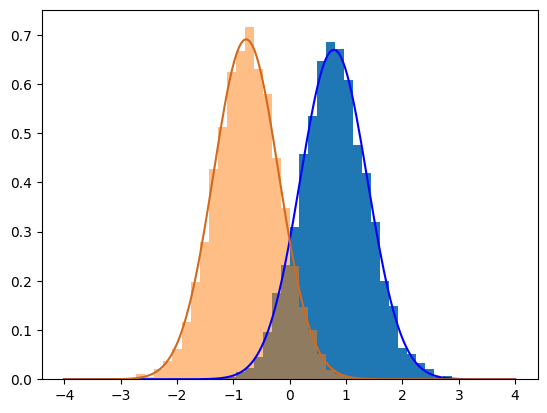

In [110]:
plt.hist(posterior[drops:,0], density=True, weights=post_weights[drops:,0], bins=50, range=(-4, 4))
plt.hist(posterior[drops:,1], density=True, weights=post_weights[drops:,1], bins=50, range=(-4, 4), alpha=0.5)

xs = numpy.linspace(-4, 4, 200)
gaussian1 = stats.norm(m1, v1**0.5).pdf(xs)
gaussian2 = stats.norm(m2, v2**0.5).pdf(xs)
plt.plot(xs, gaussian1, color='blue')
plt.plot(xs, gaussian2, color='chocolate')

In [131]:
## No need to normalize weights due to implementation of numpy.average and pyplot.hist(..., density=True)

# norm_weights1 = post_weights[:, 0] * num_samples / numpy.sum(post_weights[:, 0])
# norm_weights2 = post_weights[:, 1] * num_samples / numpy.sum(post_weights[:, 1])

# m1_, v1_ = approx_gaussian(posterior[drops:, 0], norm_weights1[drops:])
# m2_, v2_ = approx_gaussian(posterior[drops:, 1], norm_weights2[drops:])

# plt.hist(posterior[drops:,0], density=True, weights=norm_weights1[drops:], bins=50, range=(-4, 4))
# plt.hist(posterior[drops:,1], density=True, weights=norm_weights2[drops:], bins=50, range=(-4, 4), alpha=0.5)

# xs = numpy.linspace(-4, 4, 200)
# gaussian1 = stats.norm(m1_, v1_**0.5).pdf(xs)
# gaussian2 = stats.norm(m2_, v2_**0.5).pdf(xs)
# plt.plot(xs, gaussian1, color='blue')
# plt.plot(xs, gaussian2, color='chocolate')

## Burn-in period

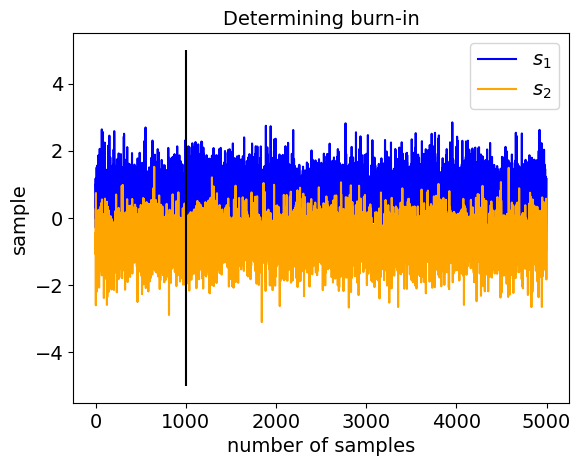

In [135]:
## Strange 'convergence' for s1 and s2 samples, maybe the prior gaussian was close to the posterior one

plt.title("Determining burn-in", fontsize=14)
plt.plot(posterior[:, 0], c='b', label=r'$s_1$')
plt.plot(posterior[:, 1], c='orange', label=r'$s_2$')
plt.vlines(drops, -5, 5, color='k')

plt.legend(fontsize=14)
plt.xlabel("number of samples", fontsize=14)
plt.ylabel("sample", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

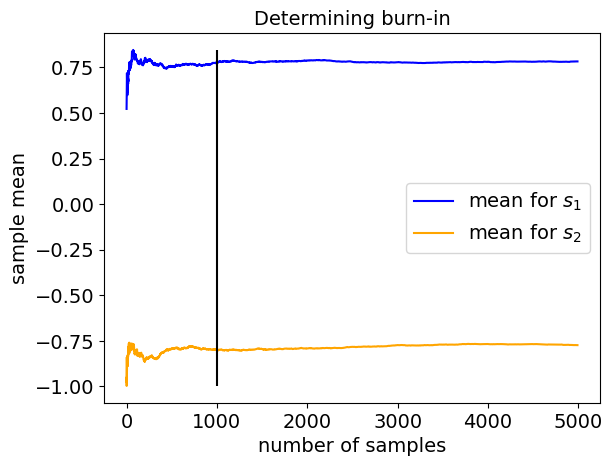

In [138]:
## Nice convergence for s1 and s2 mean (and variance)

mean_convergence = []
var_convergence = []
for sample_size in range(10, num_samples + 1):
    m1, v1 = approx_gaussian(posterior[:sample_size, 0], post_weights[:sample_size, 0])
    m2, v2 = approx_gaussian(posterior[:sample_size, 1], post_weights[:sample_size, 1])
    mean_convergence.append((m1, m2))
    var_convergence.append((v1, v2))
    
mean_convergence = numpy.array(mean_convergence)
var_convergence = numpy.array(var_convergence)

plt.title("Determining burn-in", fontsize=14)
plt.plot(mean_convergence[:, 0], c='b', label=r'mean for $s_1$')
plt.plot(mean_convergence[:, 1], c='orange', label=r'mean for $s_2$')
# plt.plot(var_convergence[:, 0], c='b', label=r'var for $s_1$')
# plt.plot(var_convergence[:, 1], c='orange', label=r'var for $s_2$')
plt.vlines(drops, numpy.min(mean_convergence), numpy.max(mean_convergence), color='k')

plt.legend(fontsize=14)
plt.xlabel("number of samples", fontsize=14)
plt.ylabel("sample mean", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Different number of samples

In [162]:
drops = 1000
sample_sizes = (2000, 3000, 4000, 5000)

mean = []
var = []
samples = []
weights = []
for num_samples in sample_sizes:

    m1, m2 = 0, 0
    v1, v2 = 1, 1

    posterior = []
    post_weights = []
    s1 = 0
    s1_w = 1

    for _ in range(num_samples):
        s2 = stats.norm.rvs(m2, v2**0.5)
        s2_w = importance(s1, s2, y)

        posterior.append((s1, s2))
        post_weights.append((s1_w, s2_w))

        s1 = stats.norm.rvs(m1, v1**0.5)
        s1_w = importance(s1, s2, y)
        
    posterior = numpy.array(posterior)
    post_weights = numpy.array(post_weights)

    samples.append(posterior)
    weights.append(post_weights)

    m1, v1 = approx_gaussian(posterior[drops:, 0], post_weights[drops:, 0])
    m2, v2 = approx_gaussian(posterior[drops:, 1], post_weights[drops:, 1])
    mean.append((m1, m2))
    var.append((v1, v2))

mean = numpy.array(mean)
var = numpy.array(var)

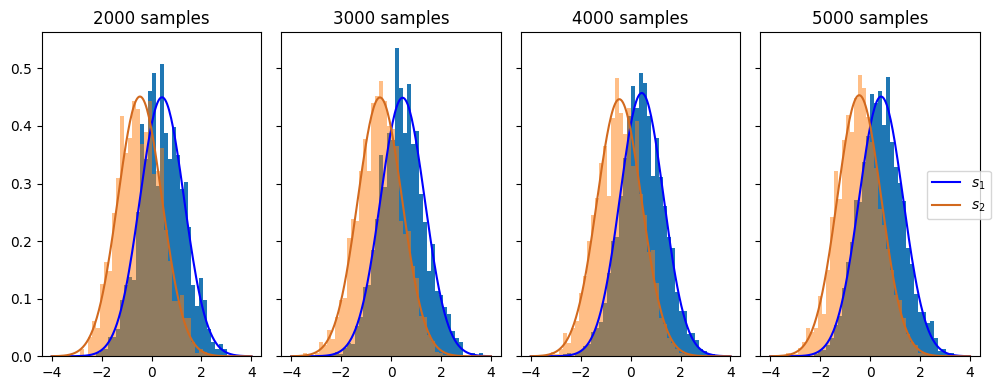

In [176]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
xs = numpy.linspace(-4, 4, 200)

for i in range(len(axs)):
    axs[i].hist(samples[i][drops:,0], density=True, weights=weights[i][drops:,0], bins=50, range=(-4, 4))
    axs[i].hist(samples[i][drops:,1], density=True, weights=weights[i][drops:,1], bins=50, range=(-4, 4), alpha=0.5)    
    axs[i].plot(xs, stats.norm(mean[i][0], var[i][0]**0.5).pdf(xs), color='blue', label=r'$s_1$')
    axs[i].plot(xs, stats.norm(mean[i][1], var[i][1]**0.5).pdf(xs), color='chocolate', label=r'$s_2$')
    axs[i].set_title(f"{sample_sizes[i]} samples")
    
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.tight_layout()

## Posterior vs. prior

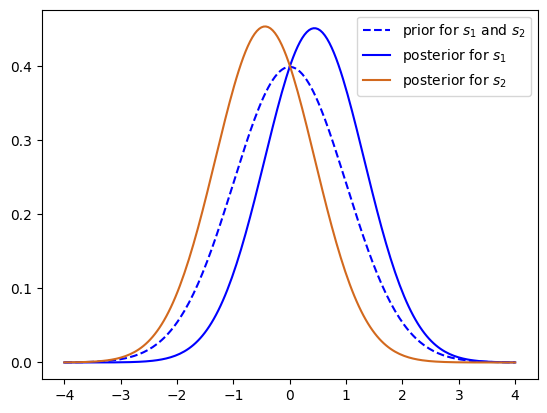

In [182]:
xs = numpy.linspace(-4, 4, 200)
prior_gaussian1 = stats.norm(0, 1).pdf(xs)
# prior_gaussian2 = stats.norm(0, 1).pdf(xs)
post_gaussian1 = stats.norm(m1, v1**0.5).pdf(xs)
post_gaussian2 = stats.norm(m2, v2**0.5).pdf(xs)
plt.plot(xs, prior_gaussian1, '--', color='blue', label=r'prior for $s_1$ and $s_2$')
# plt.plot(xs, prior_gaussian2, '--', color='chocolate')
plt.plot(xs, post_gaussian1, color='blue', label=r'posterior for $s_1$')
plt.plot(xs, post_gaussian2, color='chocolate', label=r'posterior for $s_2$')
plt.legend()